## **Assignment 3 - CNN**
Muhamad Zafran Kasman A.			18/429292/PA/18683

Muhammad Ananda Radianto 			18/425525/PA/18417

Tedjo Gaharning Radimas G.			18/429298/PA/18689

**Dataset: https://www.kaggle.com/alxmamaev/flowers-recognition**

**Library**

In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

import os
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
labels = os.listdir('./drive/MyDrive/Machine Learning/Datasets/flowers/Training')
labels

['daisy', 'rose', 'tulip']


 DAISY


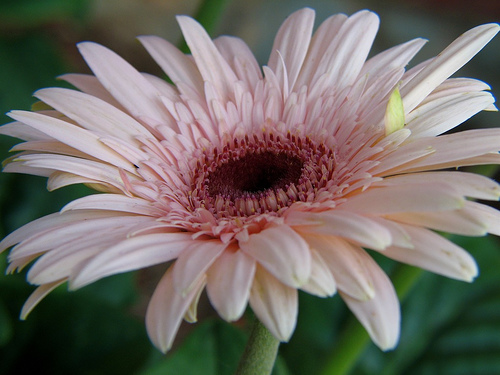

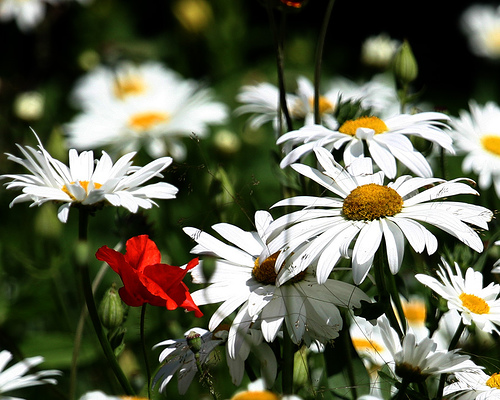

80  images of  daisy  are shown in the class

 ROSE


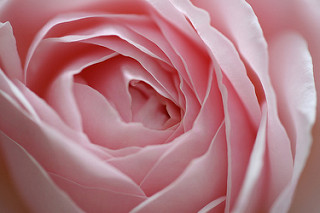

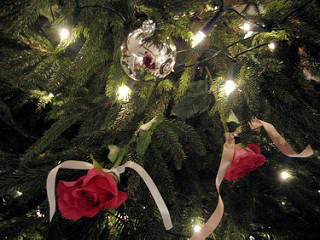

80  images of  rose  are shown in the class

 TULIP


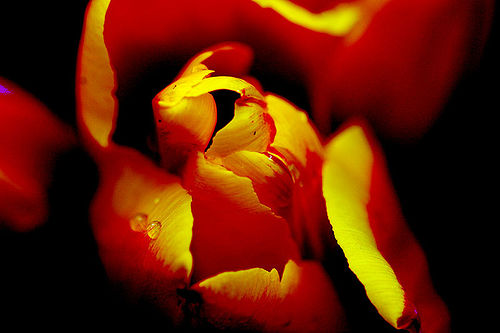

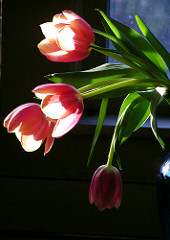

80  images of  tulip  are shown in the class


In [7]:
num = []

for i in labels:
  path = './drive/MyDrive/Machine Learning/Datasets/flowers/Training/{0}/'.format(i)
  folder_data = os.listdir(path)
  k=0
  print('\n', i.upper())
  for j in folder_data:
    if(k<2):
      display(Image(path+j))
    k=k+1
  num.append(k)
  print(k,' images of ', i, ' are shown in the class')

In [8]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

tg = datagen.flow_from_directory(directory='./drive/MyDrive/Machine Learning/Datasets/flowers/Training/', 
                                 target_size=(320,240), classes=labels, 
                                 batch_size=32, subset='training')
vg = datagen.flow_from_directory(directory='./drive/MyDrive/Machine Learning/Datasets/flowers/Training/', 
                                 target_size=(320,240), classes=labels, 
                                 batch_size=32, subset='validation')

Found 192 images belonging to 3 classes.
Found 48 images belonging to 3 classes.


In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (320,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=50, validation_data=vg, validation_steps=len(vg))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
6/6 [==============================] - 67s 11s/step - loss: 33.7492 - accuracy: 0.3802 - val_loss: 14.5520 - val_accuracy: 0.5417
Epoch 2/50
6/6 [==============================] - 14s 2s/step - loss: 9.6483 - accuracy: 0.4375 - val_loss: 5.6867 - val_accuracy: 0.4792
Epoch 3/50
6/6 [==============================] - 14s 2s/step - loss: 3.7398 - accuracy: 0.5885 - val_loss: 3.7101 - val_accuracy: 0.5417
Epoch 4/50
6/6 [==============================] - 14s 2s/step - loss: 1.8518 - accuracy: 0.6510 - val_loss: 2.3332 - val_accuracy: 0.4375
Epoch 5/50
6/6 [==============================] - 13s 2s/step - loss: 0.8293 - accuracy: 0.7552 - val_loss: 1.6774 - val_accuracy: 0.6458
Epoch 6/50
6/6 [==============================] - 13s 2s/step - loss: 0.3669 - accuracy: 0.8698 - val_loss: 1.4162 - val_accuracy: 0.5208
Epoch 7/50
6/6 [==============================] - 14s 2s/step - loss: 0.1868 - accuracy: 0.9219 - val_loss: 1.1909 - val_accuracy: 0.6250
Epoch 8/50
6/6 [===============

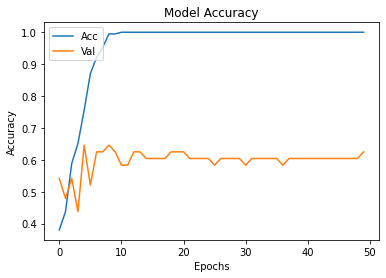

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

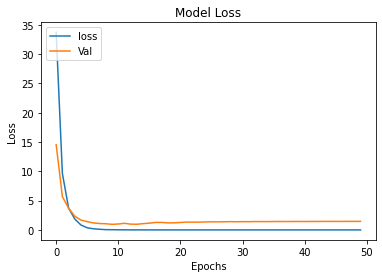

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')